<a href="https://colab.research.google.com/github/Malek-Ghorbel/ranking-semantics-Abstract-Argumentation/blob/main/ranking_semantics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

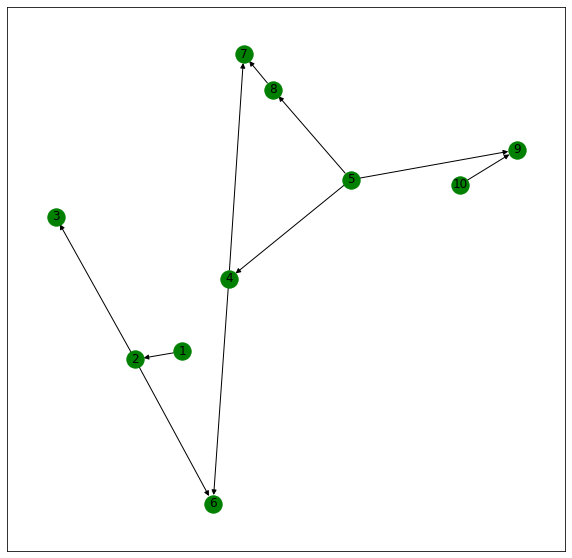

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()
a =1
b=2
c=3
d=4
e=5
f=6
g=7
h=8
i=9
j=10
G.add_nodes_from([(i+1) for i in range(10)])
G.add_edges_from([(a, b), (b , c), (b, f), (d, f), (d, g), 
                  (e, h), (e, d), (e, i),  (j, i), (h, g)])
  
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True, node_color ='green')

In [2]:
def discussion_based(G , threshhold) :
  n = G.number_of_nodes()
  nodes = list(G.nodes())
  zeros = [0 for _ in range(n)]
  pred = [list(G.predecessors(i)) for i in G.nodes()]
  step = [len(l) for l in pred]
  mat = []
  mat.append(step)

  index = 1
  while( (not (step == zeros)) and index <= threshhold) :
    index = index +1  
    dis = [[] for _ in range(n)]
    
    for i in range(n) :
      for j in pred[i] :
        for k in list(G.predecessors(j)) :
          dis[i].append( k )
          dis[i] = list(set(dis[i]))

    if index % 2 == 0 :
      step =  [-len(l) for l in dis]
    else :
      step =  [len(l) for l in dis]

    mat.append(step)
    pred = dis

  scores = list(zip(*mat))
  nodes_scores = list(zip(nodes ,  scores ))

  sorted_nodes = [x[0] for x in sorted(nodes_scores, key=lambda x: x[1:])]

  return(sorted_nodes)


In [3]:
print(discussion_based(G , 5))

['a', 'e', 'j', 'c', 'b', 'd', 'h', 'f', 'g', 'i']
